# Projeto 1 - Ciência dos Dados

Nome: Lucio Hallage Figueiredo

## Pergunta (s) a ser respondida

Países que se juntam ao Mercosul aumentam suas exportações em % do PIB(GDP)?

## Explicação da hipótese e mecanismo

Já que o Mercosul é um mercado comum entre seus países membros, ele garante a livre circulação de exportações em seus países membros, sendo assim aumentando suas exportações.

http://www.mercosul.gov.br/saiba-mais-sobre-o-mercosul

https://www.significados.com.br/mercosul/

## Bases de dados usadas

https://www.gapminder.org/data/

## Análise de dados

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#matplotlib.style.use("classic")
dados = pd.read_excel('Exports.xlsx')
dados = dados.set_index('Exports of goods and services (% of GDP)')

 O Mercosul foi criado em 1991 pelo Brasil, Paraguai, Argentina e Uruguai. Os países analisados são conhecidos como **Associados** 
do bloco e ingressaram depois de sua fundação,os países são Chile(entrou no Mercosul em 1996), Peru(entrou no Mercosul em 2003), Colombia(entrou no Mercosul em 2004), Equador(entrou no Mercosul em 2004). Agora analisaremos se os países tiveram seu número de exportações em % do PIB(GDP) aumentados quando se juntaram ao mercosul.

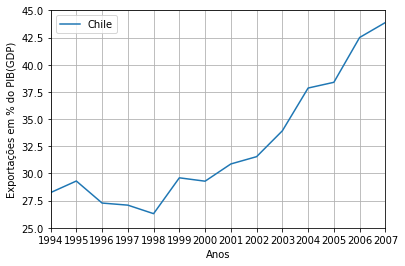

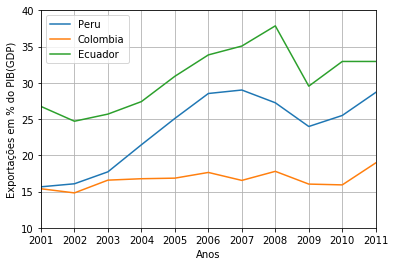

In [22]:
associados=['Chile','Peru','Colombia','Ecuador']
i=1988
anos=[]
while i<2012:
    a=str(i)
    anos.append(a)
    i+=1
for i in associados:
    
    plt.plot(dados.loc[i,anos],label=i)
    plt.axis(['2001','2011',10,40])
    plt.grid()
    plt.xlabel('Anos')
    plt.ylabel('Exportações em % do PIB(GDP)')
    plt.legend()
    if i=="Chile":
        plt.axis(['1994','2007',25,45])
        plt.show()
plt.show()
    

A análise pegou alguns anos antes para certificar se o crescimento não era algo que ja vinha acontecendo antes de entraram no bloco. Pelo o que foi visto no gráfico Chile, Ecuador e Peru tiveram aumentos significativos depois que ingressaram ao bloco, porém a colomobia foi uma exceção, pois permanece praticamente constante.


Agora vamos pegar a média mundial e comparar com os paises analisados 

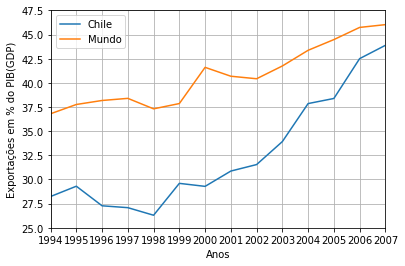

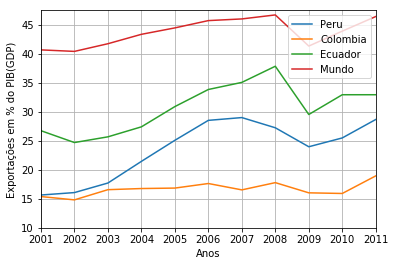

In [26]:
s=0
expm=[]
for i in dados.columns:
    if int(i)>1987:
        expm.append(dados.loc[:,i].mean())

for i in associados:
    
    plt.plot(dados.loc[i,anos],label=i)
    plt.axis(['2001','2011',10,47.5])
    plt.grid()
    plt.xlabel('Anos')
    plt.ylabel('Exportações em % do PIB(GDP)')
    plt.legend()
    if i=="Chile":
        plt.plot(anos,expm,label='Mundo')
        plt.legend()
        plt.axis(['1994','2007',25,47.5])
        plt.show()
plt.plot(anos,expm,label='Mundo')
plt.legend()
plt.show()

Pelo visto nos graficos a média mundial está subindo junto com os países do Mercosul,porém cresce menos que os países do Mercosul.

Então para obter mais certeza vamos analisar a taxa de crescimento das exportações em % do PIB(GDP), para isso vamos plotar gráficos que comparam a taxa de crescimento mundial com a taxa de crescimento dos paises analisados.

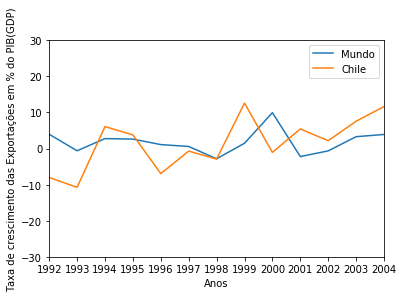

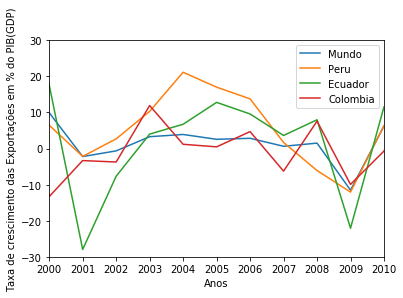

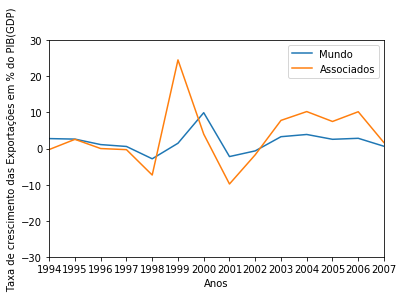

In [21]:
def tx_de_crescimento(pais):
    cresexp=[0]
    i=0
    while i<(len(pais)-1):
        cresexp.append(100*(pais[i+1]-pais[i])/pais[i])
        i+=1
    return cresexp

mundial_cres=tx_de_crescimento(dados.loc[:,anos].mean())
chile_cres=tx_de_crescimento(dados.loc['Chile',anos])
peru_cres=tx_de_crescimento(dados.loc['Peru',anos])
equador_cres=tx_de_crescimento(dados.loc['Ecuador',anos])
colombia_cres=tx_de_crescimento(dados.loc['Colombia',anos])
associados_cres=tx_de_crescimento(dados.loc[associados,anos].mean())

plt.plot(anos,mundial_cres,label='Mundo')
plt.plot(anos,chile_cres,label='Chile')
plt.xlabel('Anos')
plt.ylabel('Taxa de crescimento das Exportações em % do PIB(GDP)')
plt.legend()
plt.axis(['1992','2004',-30,30])
plt.show()

plt.plot(anos,mundial_cres,label='Mundo')
plt.plot(anos,peru_cres,label='Peru')
plt.plot(anos,equador_cres,label='Ecuador')
plt.plot(anos,colombia_cres,label='Colombia')
plt.xlabel('Anos')
plt.ylabel('Taxa de crescimento das Exportações em % do PIB(GDP)')
plt.legend()
plt.axis(['2000','2010',-30,30])
plt.show()

plt.plot(anos,mundial_cres,label='Mundo')
plt.plot(anos,associados_cres,label='Associados')
plt.xlabel('Anos')
plt.ylabel('Taxa de crescimento das Exportações em % do PIB(GDP)')
plt.legend()
plt.axis(['1994','2007',-30,30])
plt.show()



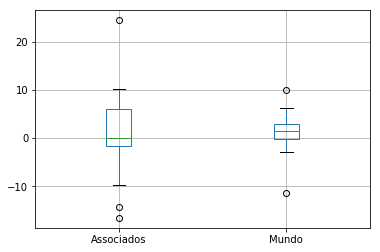

In [30]:
d = {'Associados':associados_cres, 'Mundo': mundial_cres}

df = pd.DataFrame(data=d)
print()
df.boxplot()

Com os gráficos acima parece que o crescimento mundial é bem parecido com o dos países do mercosul,indicando um crescimento mundial e não apenas dos países analisados,como podemos ver no terceiro gráfico as taxas de variação média dos Associados são bem parecidas com as taxas de variação média Mundial e no bloxpot acontece a mesma coisa, porém no boxplot a média dos associados é bem mais variavel que a mundial, isso se deve por so terem 4 países nos associados, entao se um país cresce muito em um ano varia muito por só ter 4 países, já no mundial pelo o maior número de países a variação é pouca.

## Conclusão

**Pergunta:** Países que se juntam ao Mercosul aumentam suas exportações em % do PIB(GDP)?

Os países que se juntaram ao Mercosul aumentaram suas exportações em % do PIB(GDP), porém não foi so os que entraram no Mercosul, pois a média mundial aumentou também. Então pode concluir que o aumento das exportações em % do PIB(GDP) foi uma tendência mundial e isso que é a principal causa do aumento, o Mercosul pode ter ajudado, porém não foi o essencial.

Então concluimos que a causa do crescimento foi uma tendência mundial e não o ingresso no Mercosul.